# Interpretación de datos del COVID

 Empezamos cargando las librerias que se necesitará para el análisis de los datos.
- Pandas : Libreria para manipular las tablas de datos
- Numpy : Libreria para operaciones numéricas entre los datos de las tablas
- Datetime : Librería para cargar datos de fechas
- Matplotlib: Librería para poder realizar gráficos

In [1]:
##### Importamos librerias
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

Leemos los archivos de los datasets en Excel (de preferencia en este tipo para poder visualizarlos en una tabla de Excel)
Tenemos 3 archivos de dataset:
1. Dataset de Poblacion por distrito y edad
2. Dataset de los casos positivos  
3. Dataset de los fallecidos 

In [2]:
## Data de población se asigna a la variable df_pob 
df_pob = pd.read_excel('../data/poblacion_por_distrito_y_edad.xlsx')
df_pob.head()

,Código,CONCATENADO,Código.1,POBLACION,Departamento,Provincia,Distrito,Edad 0,Edad 1 año,Edad 2 años,...,Edad 106 años,Edad 107 años,Edad 108 años,Edad 109 años,Edad 110 años,Edad 111 años,Edad 112 años,Edad 113 años,Edad 114 años,Edad 115 años
0,10101,AMAZONASCHACHAPOYASCHACHAPOYAS,10101,32589.0,Amazonas,Chachapoyas,Chachapoyas,528.0,510.0,515.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10102,AMAZONASCHACHAPOYASASUNCION,10102,262.0,Amazonas,Chachapoyas,Asuncion,6.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10103,AMAZONASCHACHAPOYASBALSAS,10103,1136.0,Amazonas,Chachapoyas,Balsas,21.0,25.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10104,AMAZONASCHACHAPOYASCHETO,10104,642.0,Amazonas,Chachapoyas,Cheto,13.0,9.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10105,AMAZONASCHACHAPOYASCHILIQUIN,10105,585.0,Amazonas,Chachapoyas,Chiliquin,8.0,8.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Data de positivos se asigna a la variable df_pos
df_pos= pd.read_excel('../data/positivos_covid.xlsx')
df_pos.head()

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,20201014,7320cabdc1aaca6c59014cae76a134e6,LIMA REGION,EN INVESTIGACIÓN,EN INVESTIGACIÓN,PCR,41.0,MASCULINO,20200527
1,20201014,e81602051997ace8340bb8c18fe24c65,LIMA,LIMA,BREÑA,PCR,41.0,MASCULINO,20200511
2,20201014,cecdbf10074dbc011ae05b3cbd320a6f,LIMA,LIMA,LIMA,PCR,51.0,MASCULINO,20200411
3,20201014,71ecb6bccb248b0bb2ac72ed51b5e979,LIMA,LIMA,SAN BORJA,PCR,26.0,FEMENINO,20200411
4,20201014,566af4276cbe9359abe93f9aa86396c3,CALLAO,CALLAO,BELLAVISTA,PCR,47.0,MASCULINO,20200415


In [4]:
# Data de fallecidos se asigna a la variable df_fad
df_fad = pd.read_excel('../data/fallecidos_covid.xlsx')
df_fad.head()

,FECHA_CORTE,UUID,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,FECHA_NAC,DEPARTAMENTO,PROVINCIA,DISTRITO
0,20201011,a253898e0cbd01a659262fba70335682,20200718,35,MASCULINO,19850529.0,LIMA,LIMA,EL AGUSTINO
1,20201011,857cef4883d2c5175da3e584704f0dff,20200718,35,MASCULINO,19850404.0,PIURA,AYABACA,PACAIPAMPA
2,20201011,945f5857768c9a5983fe64a9d6e3348d,20200718,36,MASCULINO,19830902.0,HUANUCO,LEONCIO PRADO,RUPA-RUPA
3,20201011,0846783a3b295178038282d7df20a8a9,20200718,37,FEMENINO,19830122.0,LIMA,LIMA,SAN MARTIN DE PORRES
4,20201011,b3694b6ea2cc46ba99385682c15cb0de,20200718,40,FEMENINO,19800611.0,LIMA,CAÑETE,SAN VICENTE DE CAÑETE


#  Pregunta 1 :

**¿Cuál es el distrito con mayor probabilidad de tener una segunda ola**


Para obetener la probabilidad de que en una población determinada ocurra una segunda ola de contagios,
haremos el siguiente cálculo:

$$
P = \frac{Poblacion Remanente}{Poblacion Total}
$$

Donde **P** representa la probabilidad de una segunda ola y la **población remanente** sería la diferencia entre la población total y el número registrado de casos positivos en dicha población.

## Dataset de poblacion por distrito

Entonces para calcular dicha probabilidad tenemos que hallar la población por distrito en este caso filtraremos solo ciertas columnas para que el fin que requerimos.

In [5]:
df_pob = df_pob.dropna() ## se suprimen los datos faltantes
df_pob.columns = df_pob.columns.str.strip() # borrar los espacios en las columnas que pueden estar

df_pob_distr = df_pob[['CONCATENADO', 'POBLACION', 'Departamento', 'Provincia', 'Distrito']] ##asignamos a una nueva variable 
df_pob_distr.head()

,CONCATENADO,POBLACION,Departamento,Provincia,Distrito
0,AMAZONASCHACHAPOYASCHACHAPOYAS,32589.0,Amazonas,Chachapoyas,Chachapoyas
1,AMAZONASCHACHAPOYASASUNCION,262.0,Amazonas,Chachapoyas,Asuncion
2,AMAZONASCHACHAPOYASBALSAS,1136.0,Amazonas,Chachapoyas,Balsas
3,AMAZONASCHACHAPOYASCHETO,642.0,Amazonas,Chachapoyas,Cheto
4,AMAZONASCHACHAPOYASCHILIQUIN,585.0,Amazonas,Chachapoyas,Chiliquin


Con esto ya tenemos listo nuestros datos de poblacion por distrito para poder cruzar con los datos de positivos COVID.

## Dataset de positivos por distrito

Para hallar la cantidad de positivos por distrito hacemos uso del dataset ya cargado de los positivos a nivel nacional, y realizamos el conteo asignando a cada distrito.

In [6]:
#Empezamos de los datos del total de positivos a nivel nacional
df_pos = df_pos.dropna() ## eliminamos filas de datos faltantes
# En el caso de los datos positivos aparece LIMA REGION para poder hacer el cruce correcto con la población total
# entonces cambiaremos este dato a LIMA
ind_LR = df_pos[df_pos['DEPARTAMENTO'] == 'LIMA REGION'].index ## cargamos los indices
df_pos.loc[ind_LR, 'DEPARTAMENTO'] = 'LIMA' ##asignamos ahora LIMA

Se realiza ahora el conteo de positivos para cada distrito, entonces tendremos como resultado nuestro dataset con el CONCATENADO.

In [7]:
df_pos['CONCATENADO'] = df_pos['DEPARTAMENTO'] + df_pos['PROVINCIA'] + df_pos['DISTRITO']
df_pos.head()

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,CONCATENADO
0,20201014,7320cabdc1aaca6c59014cae76a134e6,LIMA,EN INVESTIGACIÓN,EN INVESTIGACIÓN,PCR,41.0,MASCULINO,20200527,LIMAEN INVESTIGACIÓNEN INVESTIGACIÓN
1,20201014,e81602051997ace8340bb8c18fe24c65,LIMA,LIMA,BREÑA,PCR,41.0,MASCULINO,20200511,LIMALIMABREÑA
2,20201014,cecdbf10074dbc011ae05b3cbd320a6f,LIMA,LIMA,LIMA,PCR,51.0,MASCULINO,20200411,LIMALIMALIMA
3,20201014,71ecb6bccb248b0bb2ac72ed51b5e979,LIMA,LIMA,SAN BORJA,PCR,26.0,FEMENINO,20200411,LIMALIMASAN BORJA
4,20201014,566af4276cbe9359abe93f9aa86396c3,CALLAO,CALLAO,BELLAVISTA,PCR,47.0,MASCULINO,20200415,CALLAOCALLAOBELLAVISTA


Realizamos el conteo para cada CONCATENADO que representa un distrito en específico, entonces la tabla siguiente mostrará la cantidad de positivos por distrtito a nivel nacional.

In [8]:
df_pos_dis = pd.DataFrame()
df_pos_dis['CONCATENADO'] = df_pos['CONCATENADO'].unique()

df_pos_dis['CANTIDAD DE POSITIVOS']  = 0

df_pos_dis.set_index('CONCATENADO', inplace = True)

for dist in df_pos_dis.index:
    conteo = df_pos[df_pos['CONCATENADO'] == dist]['CONCATENADO'].count()
    df_pos_dis['CANTIDAD DE POSITIVOS'].loc[dist] = conteo

df_pos_dis = df_pos_dis.reset_index()

df_pos_dis.head()

,CONCATENADO,CANTIDAD DE POSITIVOS
0,LIMAEN INVESTIGACIÓNEN INVESTIGACIÓN,29648
1,LIMALIMABREÑA,4347
2,LIMALIMALIMA,30963
3,LIMALIMASAN BORJA,4231
4,CALLAOCALLAOBELLAVISTA,7132


### Realizamos el cruce entre el dataset de Positivos por distrito y la Poblacion por distrito

Aqui usamos los datasets de Poblacion por distrito y Positivos por dsitrito; y cruzamos con la llave de CONCATENADO

In [9]:
df_pod_pos =pd.merge(df_pos_dis, df_pob_distr, how = 'inner', left_on='CONCATENADO', right_on='CONCATENADO')
df_pod_pos.head()

,CONCATENADO,CANTIDAD DE POSITIVOS,POBLACION,Departamento,Provincia,Distrito
0,LIMALIMABREÑA,4347,85309.0,Lima,Lima,Breña
1,LIMALIMALIMA,30963,268352.0,Lima,Lima,Lima
2,LIMALIMASAN BORJA,4231,113247.0,Lima,Lima,San Borja
3,CALLAOCALLAOBELLAVISTA,7132,74851.0,Callao,Callao,Bellavista
4,LAMBAYEQUECHICLAYOCHICLAYO,9313,270496.0,Lambayeque,Chiclayo,Chiclayo


Para calcular la probabilidad entonces calculamos la población remanente y luego se divide con la población total en cada distrito

In [10]:
###Para calcular la probabilidad de que ocurra una segunda ola 
df_pod_pos['POBLACION REMANENTE']  = df_pod_pos['POBLACION'] - df_pod_pos['CANTIDAD DE POSITIVOS']
df_pod_pos['PROBABILIDAD DE SEGUNDA OLA'] = df_pod_pos['POBLACION REMANENTE']/df_pod_pos['POBLACION']
df_pod_pos.head()

,CONCATENADO,CANTIDAD DE POSITIVOS,POBLACION,Departamento,Provincia,Distrito,POBLACION REMANENTE,PROBABILIDAD DE SEGUNDA OLA
0,LIMALIMABREÑA,4347,85309.0,Lima,Lima,Breña,80962.0,0.949044
1,LIMALIMALIMA,30963,268352.0,Lima,Lima,Lima,237389.0,0.884618
2,LIMALIMASAN BORJA,4231,113247.0,Lima,Lima,San Borja,109016.0,0.962639
3,CALLAOCALLAOBELLAVISTA,7132,74851.0,Callao,Callao,Bellavista,67719.0,0.904717
4,LAMBAYEQUECHICLAYOCHICLAYO,9313,270496.0,Lambayeque,Chiclayo,Chiclayo,261183.0,0.965571


Por último localizamos al distrito con más probabilidad de una segunda ola y resumimos sus datos:

In [11]:
###Localizamos el que tiene mayor probabilidad de que ocurra una segunda ola
dm  = df_pod_pos['PROBABILIDAD DE SEGUNDA OLA'].idxmax()
print('El distrito con mayor probabilidad de que ocurra una segunda ola es : ', df_pod_pos.iloc[dm]['Distrito'])
print('Departamento : ', df_pod_pos.iloc[dm]['Departamento'])
print('Probabilidad : ' , df_pod_pos.iloc[dm]['PROBABILIDAD DE SEGUNDA OLA'])
print('Cantidad de positivos: ',df_pod_pos.iloc[dm]['CANTIDAD DE POSITIVOS'])
print('Población remanente: ',df_pod_pos.iloc[dm]['POBLACION REMANENTE'])
print('Población total : ',  df_pod_pos.iloc[dm]['POBLACION'])


El distrito con mayor probabilidad de que ocurra una segunda ola es :  Encañada
Departamento :  Cajamarca
Probabilidad :  0.9997913950456323
Cantidad de positivos:  4
Población remanente:  19171.0
Población total :  19175.0


# Pregunta 2

**¿Cuál es el departamento con mayor probabilidad de tener una segunda ola?**

## Dataset de poblacion por departamento

En este caso solo necesitamos la población total por departamento entonces del dataset de población por distrito agrupamos y sumamos para cada departamento.

In [12]:
df_pob_dp = pd.DataFrame()
df_pob_dp['POBLACION DEP'] = 0
df_pob_dp['POBLACION DEP'] = df_pob.groupby('Departamento')['POBLACION'].sum()
df_pob_dp = df_pob_dp.reset_index()

df_pob_dp.columns = df_pob_dp.columns.str.upper()


df_pob_dp['DEPARTAMENTO'] = df_pob_dp['DEPARTAMENTO'].str.upper()

df_pob_dp.head()

,DEPARTAMENTO,POBLACION DEP
0,AMAZONAS,379384.0
1,APURIMAC,405759.0
2,AREQUIPA,1382730.0
3,AYACUCHO,616176.0
4,CAJAMARCA,1341012.0


## Dataset de positivos por departamento

Ahora necesitamos la cantidad de positivos por cada departamento entonces del dataset de los positivos a nivel nacional, agrupamos por departamento y además se realiza el conteo para cada departamento

In [13]:
###nuevo dataset para contar la cantidad de positvos por departamento
df_pos_dep = pd.DataFrame() 
df_pos_dep['DEPARTAMENTO'] = df_pos['DEPARTAMENTO'].unique()

df_pos_dep['CANTIDAD DE POSITIVOS POR DEP'] = 0

df_pos_dep.set_index('DEPARTAMENTO', inplace = True)

for dep in df_pos_dep.index:
    cont = df_pos[df_pos['DEPARTAMENTO'] == dep]['DEPARTAMENTO'].count()
    df_pos_dep['CANTIDAD DE POSITIVOS POR DEP'].loc[dep] = cont
    
df_pos_dep = df_pos_dep.reset_index()

df_pos_dep.head()

,DEPARTAMENTO,CANTIDAD DE POSITIVOS POR DEP
0,LIMA,402133
1,CALLAO,36606
2,LAMBAYEQUE,28319
3,AREQUIPA,44256
4,PIURA,37982


## Cruce entre el dataset de Positivos por departamento y la Poblacion por departamento

Aqui usamos los datasets mencionados  y realizamos el cruce  con la llave de DEPARTAMENTO.

In [14]:
df_pdp_pos = pd.merge(df_pos_dep, df_pob_dp, how = 'inner', left_on= 'DEPARTAMENTO', right_on = 'DEPARTAMENTO')
df_pdp_pos.head()

,DEPARTAMENTO,CANTIDAD DE POSITIVOS POR DEP,POBLACION DEP
0,LIMA,402133,9485405.0
1,CALLAO,36606,994494.0
2,LAMBAYEQUE,28319,1197260.0
3,AREQUIPA,44256,1382730.0
4,PIURA,37982,1856809.0


Para calcular la probabilidad de que ocurra una segunda ola 

In [15]:
###Calculo de poblaion remanente y probabilidades
df_pdp_pos['POBLACION REMANENTE']  = df_pdp_pos['POBLACION DEP'] - df_pdp_pos['CANTIDAD DE POSITIVOS POR DEP']
df_pdp_pos['PROBABILIDAD DE SEGUNDA OLA'] = df_pdp_pos['POBLACION REMANENTE']/df_pdp_pos['POBLACION DEP']
df_pdp_pos.head()

,DEPARTAMENTO,CANTIDAD DE POSITIVOS POR DEP,POBLACION DEP,POBLACION REMANENTE,PROBABILIDAD DE SEGUNDA OLA
0,LIMA,402133,9485405.0,9083272.0,0.957605
1,CALLAO,36606,994494.0,957888.0,0.963191
2,LAMBAYEQUE,28319,1197260.0,1168941.0,0.976347
3,AREQUIPA,44256,1382730.0,1338474.0,0.967994
4,PIURA,37982,1856809.0,1818827.0,0.979544


Por último localizamos al departamento con más probabilidad de una segunda ola y resumimos sus datos:

In [16]:
###Localizamos el que tiene mayor probabilidad de que ocurra una segunda ola
mdp = df_pdp_pos['PROBABILIDAD DE SEGUNDA OLA'].idxmax()

print('Departamento con mayor probabilidad de segunda ola : ', df_pdp_pos.iloc[mdp]['DEPARTAMENTO'])
print('Probabilidad : ' , df_pdp_pos.iloc[mdp]['PROBABILIDAD DE SEGUNDA OLA'])
print('Cantidad de positivos: ',df_pdp_pos.iloc[mdp]['CANTIDAD DE POSITIVOS POR DEP'])
print('Población remanente: ',df_pdp_pos.iloc[mdp]['POBLACION REMANENTE'])
print('Población total : ',  df_pdp_pos.iloc[mdp]['POBLACION DEP'])


Departamento con mayor probabilidad de segunda ola :  APURIMAC
Probabilidad :  0.9862233493280494
Cantidad de positivos:  5590
Población remanente:  400169.0
Población total :  405759.0


# Pregunta 3

**Describa cuál será la situación de Lima Metropolitana, en términos de
si existirá o no una segunda ola**

a) Grafique la curva de las frecuencias temporales de casos postivos y fallecidos.
Explique gráficamente si se observan caídas o incrementos en la información.

### Graficos de Positivos y Fallecidos en Lima Metropolitana

### Grafico de Positivos en Lima Metropolitana

De la datos de positivos cargada ya anteriormente solo filtraremos los que sean de Lima Metropolitana , corresponde a la provincia de Lima y la provincia del Callao; luego resumimos los datos estadisticos importantes para poder interpretarlos.

In [17]:
df_ptlima = df_pos[(df_pos['PROVINCIA'] == 'LIMA') | (df_pos['PROVINCIA'] == 'CALLAO')]
#df_ptlima.head()
df_pos_lima = pd.DataFrame()
df_pos_lima['NRO POSITIVOS DIARIO'] =0 
df_pos_lima['NRO POSITIVOS DIARIO'] = df_ptlima.groupby('FECHA_RESULTADO')['FECHA_RESULTADO'].count()
df_pos_lima.reset_index(inplace = True)

print('Descripción de los positivos registrados en Lima Metropolitana')
print(df_pos_lima['NRO POSITIVOS DIARIO'].describe())

Descripción de los positivos registrados en Lima Metropolitana
count     233.000000
mean     1632.862661
std      1010.188950
min         1.000000
25%       972.000000
50%      1541.000000
75%      2335.000000
max      4503.000000
Name: NRO POSITIVOS DIARIO, dtype: float64


Graficamos los datos positivos con respecto a las fechas del resultado dado en los examenes

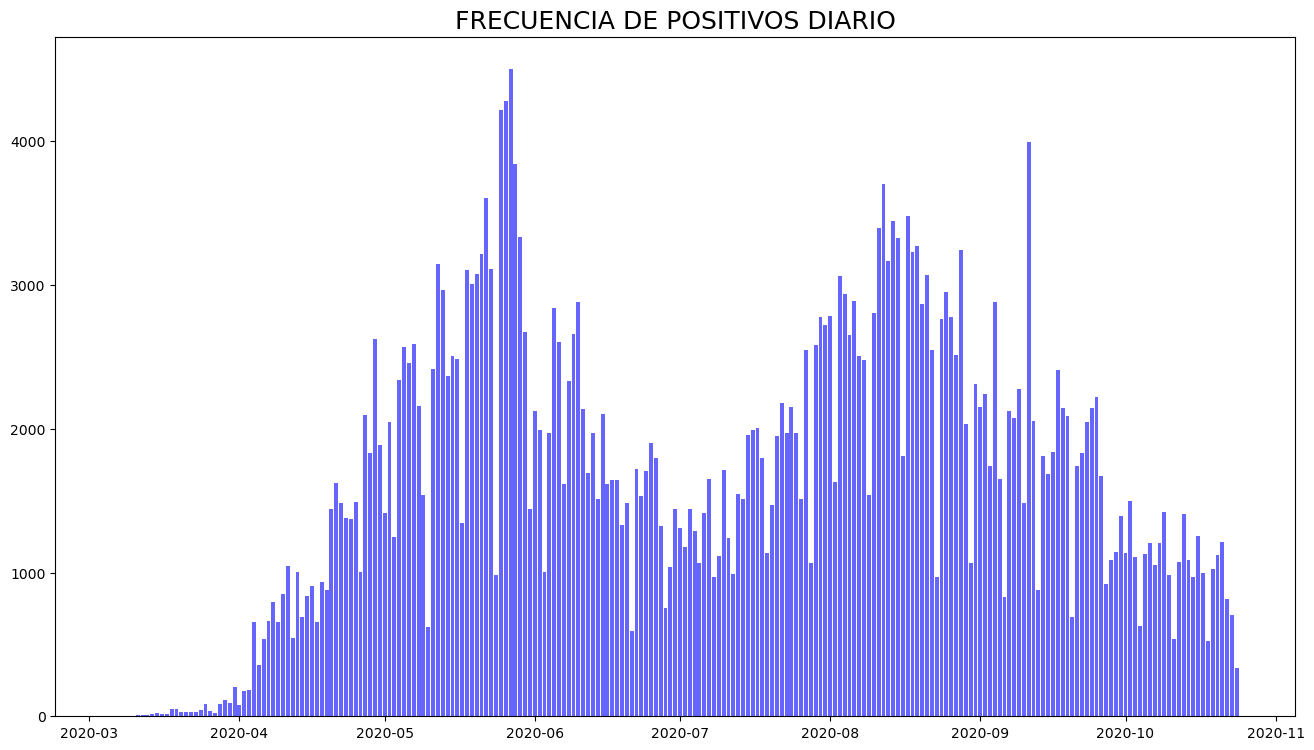

In [18]:
###grafica 
import datetime
import matplotlib.pyplot as plt

df_pos_lima['FECHA'] = pd.to_datetime(df_pos_lima['FECHA_RESULTADO'], format='%Y%m%d')

x1 = df_pos_lima['FECHA']
y1 = df_pos_lima['NRO POSITIVOS DIARIO'].tolist()

fig1, ax1 = plt.subplots(1, 1, figsize=(16,9), dpi= 100)
ax1.bar(x1, y1, color='blue', linewidth=2, alpha=0.6)
ax1.set_title('FRECUENCIA DE POSITIVOS DIARIO', fontsize=18)

plt.show()

### Grafico de Fallecidos en Lima Metropolitana

De la datos de fallecidos tenemos que cargar solo los que corresponden a Lima Metropolitana como en el caso anterior, además resumimos datos estadisticos importantes para poder interpretarlos.

In [19]:
df_fdlim = df_fad[(df_fad['PROVINCIA'] == 'LIMA') | (df_fad['PROVINCIA'] == 'CALLAO')]

df_fad_lima = pd.DataFrame()
df_fad_lima['NRO DE FALLECIDOS'] = 0

df_fad_lima['NRO DE FALLECIDOS'] = df_fdlim.groupby('FECHA_FALLECIMIENTO')['FECHA_FALLECIMIENTO'].count()
df_fad_lima.reset_index(inplace = True)

print('Descripción de los fallecidos registrados en Lima Metropolitana')
print(df_fad_lima['NRO DE FALLECIDOS'].describe())

Descripción de los fallecidos registrados en Lima Metropolitana
count    218.000000
mean      70.949541
std       34.340692
min        1.000000
25%       44.000000
50%       74.000000
75%       95.750000
max      164.000000
Name: NRO DE FALLECIDOS, dtype: float64


Graficamos los datos positivos con respecto a las fechas de fallecimiento registrado en el dataset.

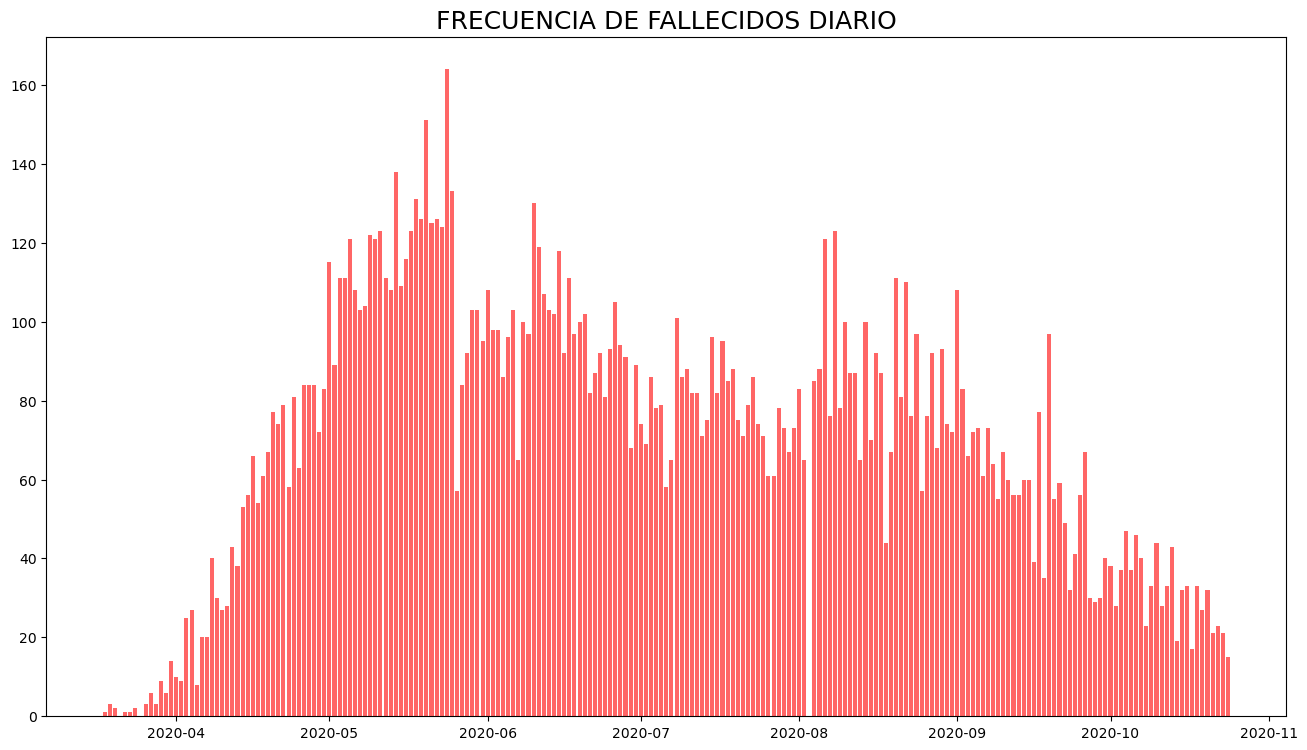

In [20]:
###grafica 

df_fad_lima['FECHA'] = pd.to_datetime(df_fad_lima['FECHA_FALLECIMIENTO'], format='%Y%m%d')

x2 = df_fad_lima['FECHA']
y2 = df_fad_lima['NRO DE FALLECIDOS'].tolist()

fig2, ax2 = plt.subplots(1, 1, figsize=(16,9), dpi= 100)
ax2.bar(x2, y2, color='red', linewidth=2, alpha=0.6)
ax2.set_title('FRECUENCIA DE FALLECIDOS DIARIO', fontsize=18)

plt.show()

### Datos Lima Metropolitana

b) ¿Qué tan probable es que haya una segunda ola de infección en Lima? 

Para poder responder la pregunta interpretaremos los datos correspondientes a Lima Metropolitana

In [21]:
#
df_lima = df_pob[(df_pob['Provincia'] == 'Lima') | (df_pob['Provincia'] == 'Callao')]
poblacion_lima = np.sum(df_lima['POBLACION'])
total_positivos = np.sum(df_pos_lima['NRO POSITIVOS DIARIO'])
total_fallecidos = np.sum(df_fad_lima['NRO DE FALLECIDOS'])
pob_rem_lima = poblacion_lima - total_positivos
prob_seg = pob_rem_lima/poblacion_lima
porc_letal = (total_positivos/poblacion_lima)*100
print('La poblacion total correspondiente a Lima Metropolitana es : ', int(poblacion_lima))
print('Total de positivos en Lima Metropolitana es : ', total_positivos)
print('Total de poblacion remanente en Lima Metropolitana es : ', pob_rem_lima)
print('La cantidad total de fallecidos es: ', total_fallecidos)
print('Tasa de mortalidad en Lima Metropolitana es : {} %'.format(porc_letal))
print('Probabilidad de segunda ola es : ', prob_seg)

La poblacion total correspondiente a Lima Metropolitana es :  9569468
Total de positivos en Lima Metropolitana es :  380457
Total de poblacion remanente en Lima Metropolitana es :  9189011.0
La cantidad total de fallecidos es:  15467
Tasa de mortalidad en Lima Metropolitana es : 3.975738254205981 %
Probabilidad de segunda ola es :  0.9602426174579402


Sí es altamente probable que ocurra una segunda ola

Se puede apreciar en los gráficos que hay caidas en la cantidad de positivos y tambien así de fallecidos, siguen 
sumando en el registro acumulado pero da una transición a una caída. Pero considerando que la cantidad de positivos
no tiene mucho margen de error se calcula una alta población remanente que es muy probable que en los próximos meses puedan
considerarse a la cantidad de positivos, y además con la tasa de mortalidad para Lima es relativamente alta, considerando que 
se levanten las restricciones dadas por el Gobierno.